In [1]:
import  gymnasium as gym
import torch
import random
import numpy as np
import torch.nn as nn
import torch.optim as optim
from copy import deepcopy
from tqdm import tqdm
from memory import RandomReplayMemory, PrioritizedReplayMemory
from train import Agent
from pathos.multiprocessing import ProcessingPool as Pool
from gridWorldEnv import GridWorldEnv
import matplotlib.pyplot as plt
import time

device = torch.device("cpu")


pygame 2.5.2 (SDL 2.28.3, Python 3.10.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


c:\Users\navid\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\envs\registration.py:307: DeprecationWarning: The package name gym_minigrid has been deprecated in favor of minigrid. Please uninstall gym_minigrid and install minigrid with `pip install minigrid`. Future releases will be maintained under the new package name minigrid.
  fn()


In [2]:

def env_changes(env, ep_num):
    if ep_num == 0:
        env.switch_doors(top_door="open",bottom_door="closed")
    elif ep_num == 300:
        env.switch_doors(top_door="closed",bottom_door="open")
    elif ep_num == 700:
        env.switch_doors(top_door="open",bottom_door="closed")

parameters1 = {
        "gamma": 0.99,
        "lr": 5e-4,
        "TAU": 0.01,
        "episode_num": 1000,
        "batch_size": 64,
        "epsilon_max": 0.1,
        "epsilon_min": 0.1,
        "device": device,
        "max_episode_len": 100,
        "non_stationarity": True,
        "env_changes": env_changes,
        "env": GridWorldEnv(size=10), #render_mode= "human", 
        # "env":  gym.make("CartPole-v1"),
        "buffer": RandomReplayMemory(buffer_size= 50_000, device = device),
        # "buffer": PrioritizedReplayMemory(buffer_size= 50_000, device = device, alpha=0.7, beta=0.2)
        }

# env = parameters1['env']
# env2 = gym.make("CartPole-v1")
# st , _ = env.reset()

# print(st)
# time.sleep(3)
# env.switch_doors(1)
# env.step(0)
# time.sleep(3)
# env.switch_doors(0)
# env.step(0)
# time.sleep(3)
# env.switch_doors(1)
# env.step(0)

agent = Agent(**parameters1)
ep_len, loss_vals = agent.train()


100%|██████████| 1000/1000 [01:09<00:00, 14.34it/s]


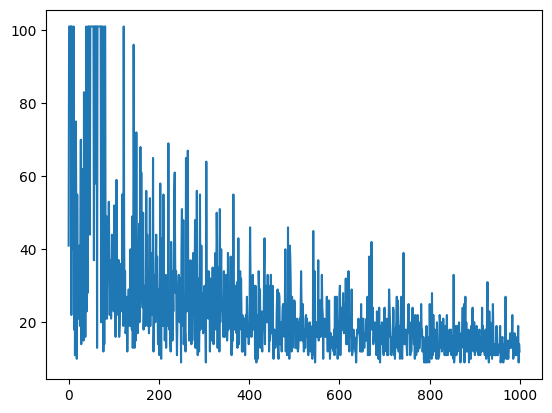

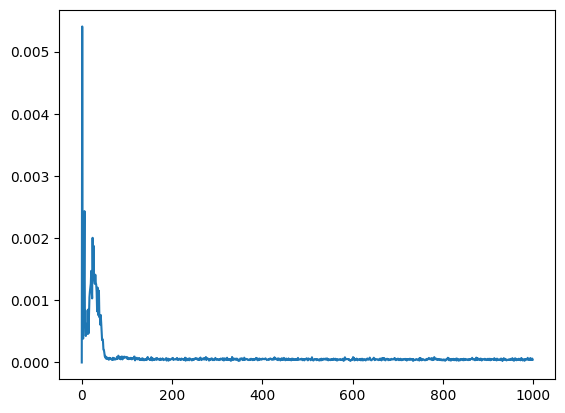

In [5]:

plt.plot(ep_len)
plt.show()
plt.plot(loss_vals)
plt.show()